# Image manipulation with opencv

## Finding contours  
#### Steps
1. Read image as grey scale image.
2. Use cv2.threshold() function to obtain the threshold image.
3. Use cv2.findContours() and pass the threshold image and necessary parameters.
4. findContours() returns contours. You can draw it on the original image or a blank image.

source: <img src='images/flamenco_dance.jpg' width=300>

## Thresholding
Image thresholding is used to binarize the image based on pixel intensities. The input to such thresholding algorithm is usually a grayscale image and a threshold. The output is a binary image.

In [ ]:
import cv2
import numpy as np
img_loc = 'images/flamenco_dance.jpg'
# 1
img = cv2.imread(img_loc, cv2.IMREAD_UNCHANGED)
print(img.shape)
# 2
img_grey = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
print(img_grey.shape)
# 3
thresh = 200 # the lower the threshhold the more details we get
ret,thresh_img = cv2.threshold(img_grey, thresh, 255, cv2.THRESH_BINARY)
# 4
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [ ]:
# Draw the contours
import matplotlib.pyplot as plt
#create an empty image for contours
img_contours = np.zeros(img.shape)
# draw the contours on the empty image
cv2.drawContours(img_contours, contours, -1, (255,255,255), 3)
#save image
cv2.imwrite('data/flamenco_contours.png',img_contours) 
plt.imshow(img_contours, interpolation='none')

In [ ]:
!ls data/flam*

### Contours
<img src='data/flamenco_contours.png' width=400>

## Detecting number of shapes
Example inspired from [Stackoverflow example](https://stackoverflow.com/questions/51400374/image-card-detection-using-python)
<img src="images/mixed_cards.jpg" width=300>

Image shape (705, 1028, 3) Thresh (705, 1028) [  0 254 255]
There are 6 cards


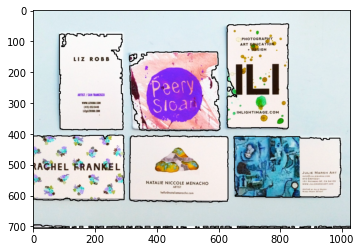

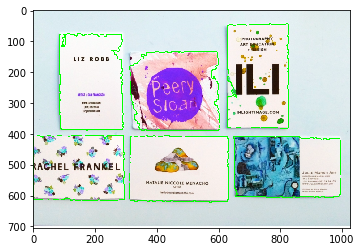

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('images/mixed_cards.jpg', 1)

# convert the image to HSV color space
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)


# find Otsu threshold on hue and saturation channel
ret, thresh_H = cv2.threshold(img_hsv[:,:,0], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
ret, thresh_S = cv2.threshold(img_hsv[:,:,1], 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# some morphology operation to clear unwanted spots
kernel = np.ones((5, 5), np.uint8)
thresh = thresh_H + thresh_S
print('Image shape',img_hsv.shape,'Thresh',thresh.shape,np.unique(thresh))
img_dilated = cv2.dilate(thresh, kernel, iterations = 1)

# find contours on the result above
(contours, hierarchy) = cv2.findContours(img_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
im1 = img.copy()
for c in contours:
    cv2.drawContours(im1, contours=[c], contourIdx=-1, color=(0,0,0),thickness=2)
plt.imshow(im1)
plt.figure()

# since there were few small contours found, retain only those above a certain area above 500 pixels
im2 = img.copy()
count = 0
for c in contours:
    if cv2.contourArea(c) > 500:
        count+=1
        cv2.drawContours(im2, [c], -1, (0, 255, 0), 2)

plt.imshow(im2, interpolation='none')
print(f'There are {count} cards')